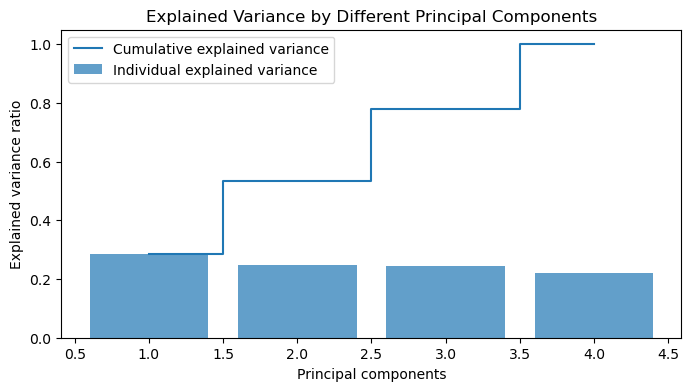

(array([0.28653597, 0.24844255, 0.244354  , 0.22066748]),
 array([0.28653597, 0.53497852, 0.77933252, 1.        ]))

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/qbs/games.csv'
games_data = pd.read_csv(file_path)

# Selecting numerical features for PCA
# Assuming the dataset structure is similar to the previous one, selecting the same features
numerical_features = ['Peak CCU', 'Required age', 'Price', 'DLC count']
numerical_data = games_data[numerical_features]

# Handling missing values - replacing them with the mean of each column
numerical_data = numerical_data.fillna(numerical_data.mean())

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Different Principal Components')
plt.show()

# Outputting the explained variance for further analysis
explained_variance, explained_variance.cumsum()


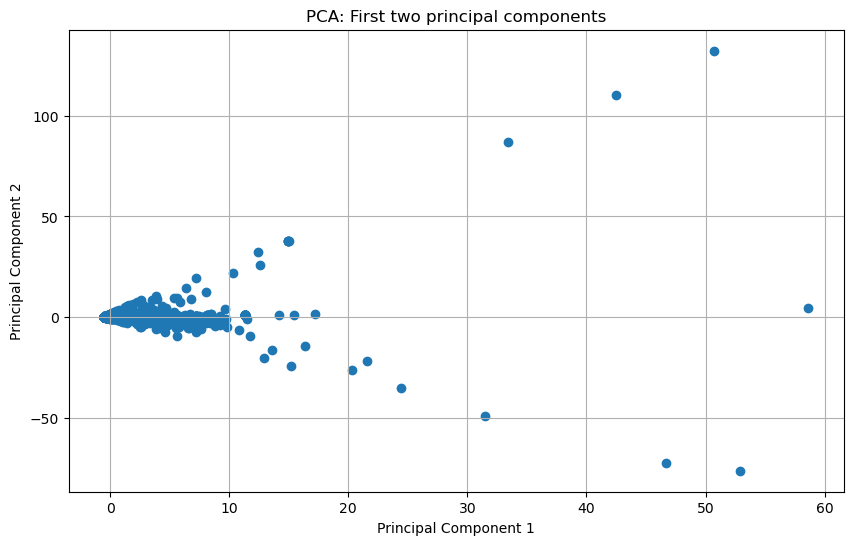

In [3]:
# Visualization of the reduced-dimensional data using the first two principal components

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_data[:, :2], columns=['PC1', 'PC2'])

# Plotting the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First two principal components')
plt.grid(True)
plt.show()


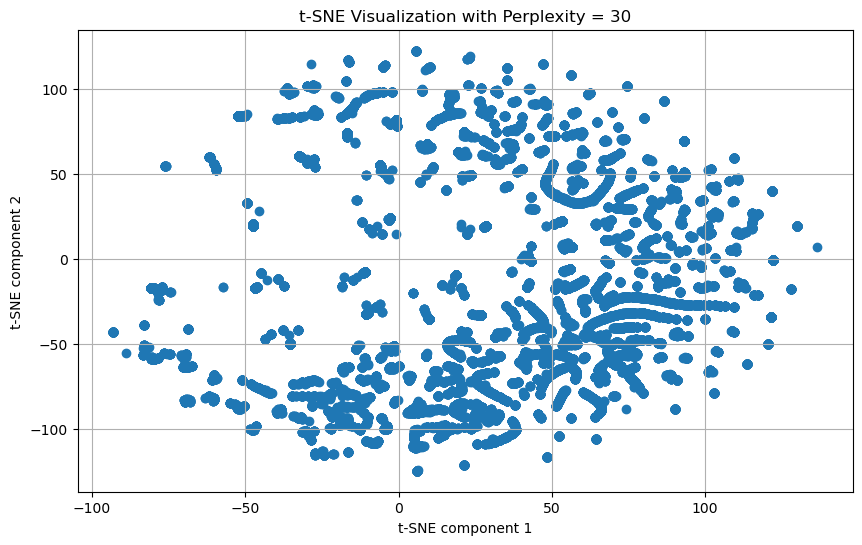

In [4]:
from sklearn.manifold import TSNE

# Implementing t-SNE with an initial perplexity value
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# Creating a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_data, columns=['t-SNE 1', 't-SNE 2'])

# Plotting the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'])
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE Visualization with Perplexity = 30')
plt.grid(True)
plt.show()
